## End-to-end machine learning problem - Part 1

### Predict if income goes above or below \$50k/yr based on census data 

<img src="https://thelendersnetwork.com/wp-content/uploads/2017/11/what-is-annual-income-1.jpg" width=600>

### Goal: 
You are the data scientist assigned to perform the data pre-processing and preparing the data for Machine Learning algorithms. 

In this hands-on, you are only required to 
1. perform data exploration to understand the data
2. pre-processing of the data, including fix all the missing values (set the missing values to median values) and any other ones that you think are appropriate to perform.
3. prepare the test and training sets, including performing transformations. 

In the next hands-on, we will use 14 out of 15 attributes as pedictors describe below to predict if income goes above or below \$50K/yr based on census data. `Income` will be the label. 

### Data: 
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

### Fields:
The dataset contains 15 columns

#### Target field: Income
- The income is divide into two classes: 50K

#### Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: final weight. The number of people the census believes the entry represents.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

Note: "?" is used to represent missing data in this dataset.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

adults = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv"

df = pd.read_csv(adults, na_values=['?'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# 1. perform data exploration to understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'occupation',
            'relationship', 'race', 'gender', 'native-country']

for cat_var in cat_vars:
  print(df[cat_var].value_counts(), '\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales             

In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


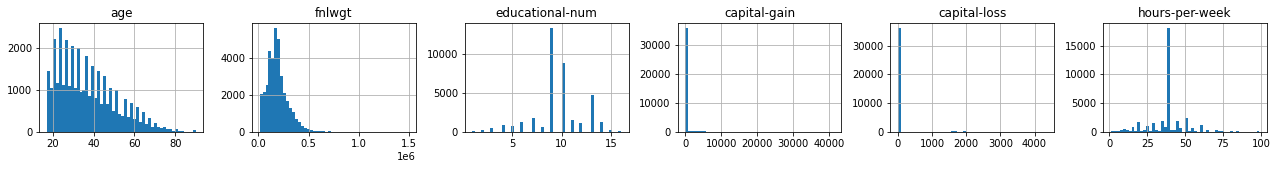

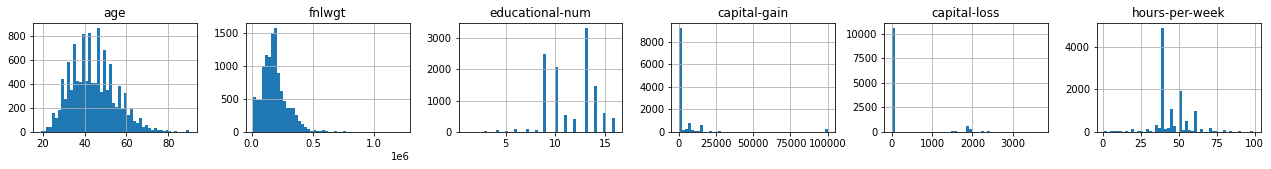

In [6]:
df[df.income == '<=50K'].hist(bins=50, figsize=(22, 2), layout=(1,6))
df[df.income == '>50K'].hist(bins=50, figsize=(22, 2), layout=(1,6))
plt.show()

In [7]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
df = df.dropna().reset_index(drop=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# 2. pre-processing of the data, including fix all the missing values (set the missing values to median values) 
#    and any other ones that you think are appropriate to perform.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

df['age_cat'] = pd.cut(df['age'], 
                     bins = [0, 25, 40, 50, 65, np.inf],
                     labels = [1, 2, 3, 4, 5])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,c_age,age_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,2,2
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,2,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,3,3
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,2,2
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,2,2
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4,4
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1,1


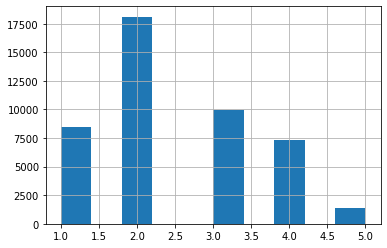

In [12]:
df["age_cat"].hist();

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
splitidx = split.split(df, df['age_cat'])
#print(splitidx)
for train_index, test_index in split.split(df, df['age_cat']):
    print(train_index, test_index)
    print(len(train_index), len(test_index))
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<generator object BaseShuffleSplit.split at 0x7f424f4c5950>
[ 6714  3871 24244 ... 10626  6356  4558] [33855  5706 18486 ...  1688 16764 38339]
36177 9045


In [22]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

def get_cat_proportions(data):
  return data['age_cat'].value_counts() / len(data)

compareprops = pd.DataFrame({
    'Overall': get_cat_proportions(df),
    'Stratified': get_cat_proportions(strat_test_set),
    'Random': get_cat_proportions(test_set),
}).sort_index()
compareprops['Rand. %error'] = 100*compareprops['Random']/compareprops['Overall']-100
compareprops['Strat. %error'] = 100*compareprops['Stratified']/compareprops['Overall']-100            
compareprops                          

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.186666,0.186622,0.182145,-2.421834,-0.023099
2,0.400475,0.400442,0.401050,0.143545,-0.008292
3,0.220914,0.220896,0.218905,-0.909118,-0.008292
4,0.162230,0.162300,0.167772,3.416198,0.042820
5,0.029715,0.029740,0.030127,1.386941,0.084724


In [23]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop('age_cat', axis=1, inplace=True)

df=strat_train_set.drop('income', axis=1)
df_labels=strat_train_set['income'].copy()

In [24]:
# 3. prepare the test and training sets, including performing transformations.
from sklearn.base import BaseEstimator, TransformerMixin

gain_idx, loss_idx, hours_idx=[
    list(df.columns).index(col) 
    for col in ('capital-gain', 'capital-loss', 'hours-per-week')]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_capital_per_hpw = True):
      self.add_capital_per_hpw = add_capital_per_hpw

  def fit(self, X, y=None):
      return self
      
  def transform(self, X, y=None):
      capital_net = X[:, gain_idx] - X[:, loss_idx]
      if self.add_capital_per_hpw:
          capital_per_hpw = capital_net/X[:, hours_idx]
          return np.c_[X, capital_net, capital_per_hpw]
      else:
          return np.c_[X, capital_net]

In [26]:
attr_adder = CombinedAttributesAdder()
df_extra_attribute = attr_adder.transform(df.values)

In [25]:
df_extra_attribute = pd.DataFrame(
    df_extra_attribute, 
    columns = list(df.columns)+['capital-net', 'capital-per-hpw'],
    index=df.index)

df_extra_attribute.sort_values('capital-net')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,capital-net,capital-per-hpw
28721,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,-4356,-242.0
33980,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,-3900,-97.5
37117,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,-3900,-97.5
29828,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,-3770,-94.25
8598,52,Private,106176,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,-3770,-94.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36145,65,Private,105491,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,99999,2499.975
39231,71,Self-emp-inc,38822,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,99999,2499.975
29047,62,Self-emp-inc,245491,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,99999,0,40,United-States,99999,2499.975
17976,36,Private,208358,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,99999,2222.2


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_vars = [var for var in list(df) if var not in cat_vars]

gain_idx, loss_idx, hours_idx = [num_vars.index(col) for col in('capital-gain', 'capital-loss', 'hours-per-week')]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [28]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
6714,58,Self-emp-not-inc,127539,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,2407,0,25,United-States
3871,36,Private,250224,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,Black,Female,0,0,40,United-States
24244,31,Self-emp-inc,49923,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
20681,60,Private,187124,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
44667,36,Self-emp-inc,102729,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302,42,Private,344572,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
21288,63,Private,273010,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,3471,0,40,United-States
10626,30,Private,92531,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
6356,61,Federal-gov,294466,Some-college,10,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States


In [32]:
num_vars = [var for var in list(df) if var not in cat_vars]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_vars),
    ('cat', OneHotEncoder(), cat_vars),
])

df_prepared = full_pipeline.fit_transform(df)
df_prepared.toarray()

array([[ 1.47236064, -0.59010405, -1.61306708, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19274253,  0.57809161, -0.43899016, ...,  1.        ,
         0.        ,  0.        ],
       [-0.57117507, -1.32915671, -0.43899016, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.64686158, -0.92344712,  1.12644573, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.69942016,  0.99936   , -0.04763119, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17666713,  1.4860344 ,  1.12644573, ...,  1.        ,
         0.        ,  0.        ]])

Select ML models & perform 10-fold cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 

lb = preprocessing.LabelBinarizer()
lb.fit(df_labels)
print(lb.classes_)
labelencoded = lb.transform(df_labels).ravel()
labelencoded

['<=50K' '>50K']


array([0, 0, 0, ..., 1, 0, 0])

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(df_prepared, labelencoded)
score = cross_val_score(RF, df_prepared, labelencoded, cv=10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() *2))

Random Forest Classifier Accuracy: 0.79 (+/- 0.00)


In [ ]:
lreg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter=1000)
clf = lreg.fit(df_prepared, labelencoded)
score = cross_val_score(clf, df_prepared, labelencoded, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2)) 

Logistic Regression Accuracy: 0.85 (+/- 0.01)


Perform fine-tuning on best model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'C': [1, 10, 20, 30],
         'intercept_scaling': [1.0, 5.0]
        }
]

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=100)
grid_search = GridSearchCV(clf, param_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(df_prepared, labelencoded)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'C': [1, 10, 20, 30],
                          'intercept_scaling': [1.0, 5.0]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
cvres = grid_search.cv_results_
cvres
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8464496474406147 {'C': 1, 'intercept_scaling': 1.0}
0.8465049189587954 {'C': 1, 'intercept_scaling': 5.0}
0.8461732287171033 {'C': 10, 'intercept_scaling': 1.0}
0.8461732287171031 {'C': 10, 'intercept_scaling': 5.0}
0.8460903023358922 {'C': 20, 'intercept_scaling': 1.0}
0.8460903023358922 {'C': 20, 'intercept_scaling': 5.0}
0.8460903023358922 {'C': 30, 'intercept_scaling': 1.0}
0.8461179419157705 {'C': 30, 'intercept_scaling': 5.0}


Test ML model using test set

In [46]:
print(grid_search.best_params_)
grid_search.best_estimator_

{'C': 1, 'intercept_scaling': 5.0}


LogisticRegression(C=1, intercept_scaling=5.0, random_state=0,
                   solver='liblinear')

In [49]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("income", axis=1)
y_test = strat_test_set["income"].copy()

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test_encoded = lb.transform(y_test).ravel()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

print("Accuracy of the logistic regression model with test data:",
      round(final_model.score(X_test_prepared, y_test_encoded),4))

Accuracy of the logistic regression model with test data: 0.8534


Plot ROC curves

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


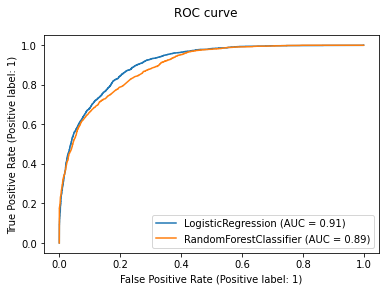

In [54]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

lrc_disp = plot_roc_curve(final_model, X_test_prepared, y_test_encoded)
rfc_disp = plot_roc_curve(RF, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)
lrc_disp.figure_.suptitle("ROC curve")


plt.show()